In [68]:
import cv2 as cv
import matplotlib.pyplot as plt

### Helper Functions

In [69]:
def show(image, title ="", size = 15):
    width, height = image.shape[0], image.shape[1]
    aspect_ratio = width/height
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(title)
    plt.show()

### 1 -	Open ‘OpenCV’ and ‘I_Love_OpenCV’ images. 

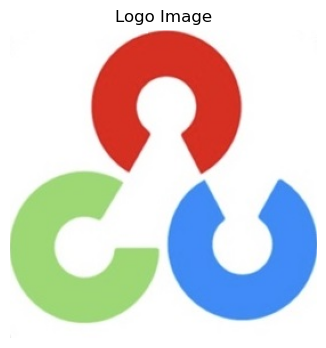

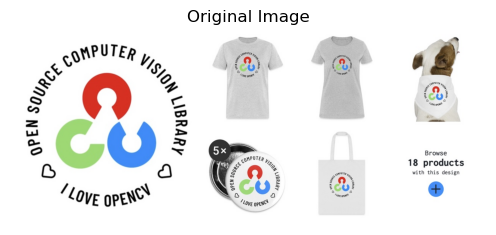

In [93]:
img1_original = cv.imread('Assignment3_Files/OpenCV.jpg')
img2_original = cv.imread('Assignment3_Files/I_Love_OpenCV.jpg')

assert img1_original is not None, 'OpenCV not found'
assert img2_original is not None, 'I Love OpenCV not found'

show(img1_original, 'Logo Image', 4)
show(img2_original, 'Original Image')

### 2 -	Use ORB descriptors to match features. Show the results for the top 15 and the top 20 matches using the matcher below and paste the results here. 
        - a.	BFMatcher
        - b.	FlanBasedMatcher


In [94]:
img1 = cv.cvtColor(img1_original, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(img2_original, cv.COLOR_BGR2GRAY)

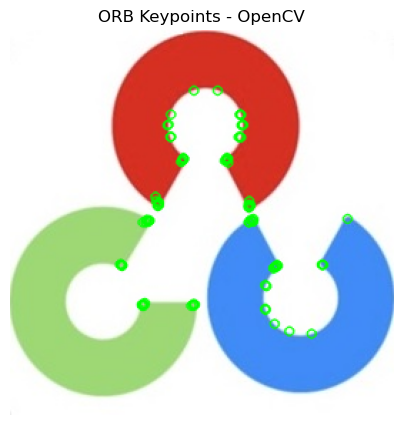

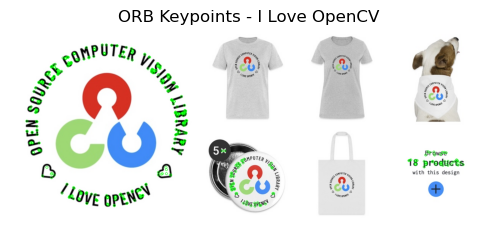

In [95]:
orb = cv.ORB_create()
 
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
 
kp_img_1 = cv.drawKeypoints(img1_original, kp1, None, color=(0,255,0), flags=0)
kp_img_2 = cv.drawKeypoints(img2_original, kp2, None, color=(0,255,0), flags=0)
show(kp_img_1, 'ORB Keypoints - OpenCV', 5)
show(kp_img_2, 'ORB Keypoints - I Love OpenCV')


#### BFMatcher

In [103]:
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

matches_bf = bf.match(des1, des2)

matches_bf = sorted(matches_bf, key=lambda x: x.distance)

img_bf_15 = cv.drawMatches(img1_original, kp1, img2_original, kp2, matches_bf[:15], None)
img_bf_20 = cv.drawMatches(img1_original, kp1, img2_original, kp2, matches_bf[:20], None)
# img_bf_20 = cv.drawMatches(img1_original, kp1, img2_original, kp2, matches_bf[:20], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

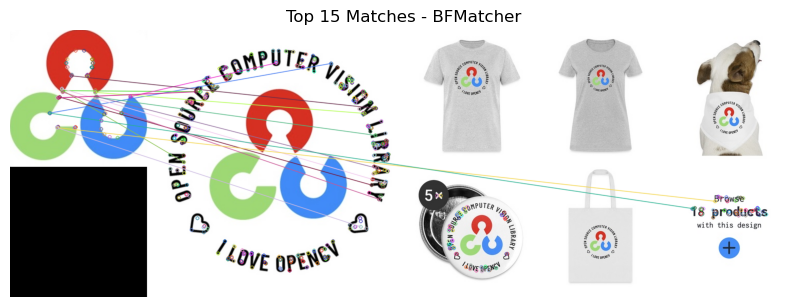

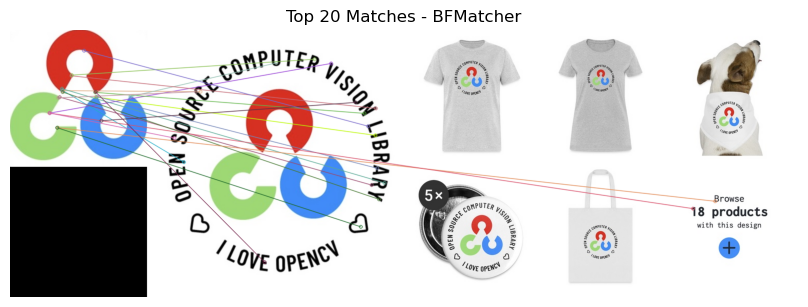

In [104]:
show(img_bf_15, 'Top 15 Matches - BFMatcher', 30)
show(img_bf_20, 'Top 20 Matches - BFMatcher', 30)

#### FlanBasedMatcher

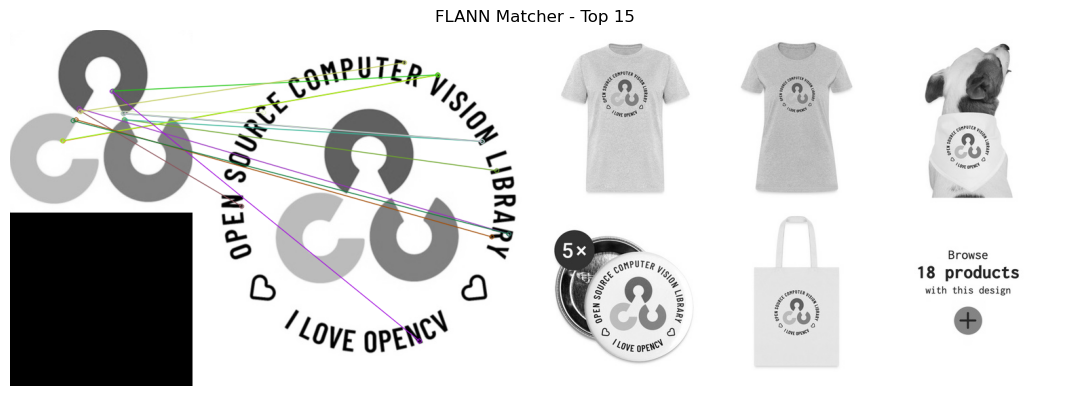

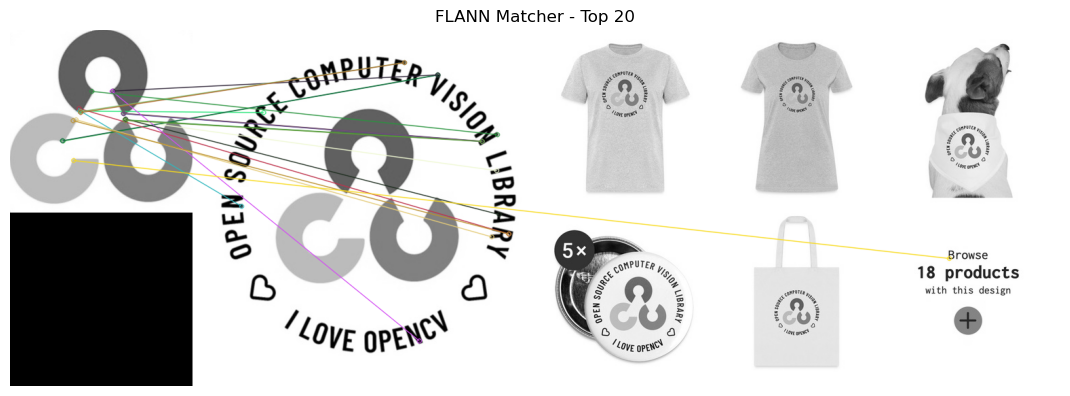

In [92]:
index_params = dict(algorithm=6, table_number=6, key_size=12, multi_probe_level=1)
search_params = dict(checks=50) 

flann = cv.FlannBasedMatcher(index_params,search_params)
flann_matches = flann.match(des1,des2)

flann_matches = sorted(flann_matches, key=lambda x: x.distance)

img_15 = cv.drawMatches(img1, kp1, img2, kp2, flann_matches[:15], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
show(img_15, 'FLANN Matcher - Top 15', 40)

img_20 = cv.drawMatches(img1, kp1, img2, kp2, flann_matches[:20], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
show(img_20, 'FLANN Matcher - Top 20', 40)

### 3 -	How are the keypoints matched? What is the difference between these two matchers? Which one works better? Why is that?

### 4 -	Use SIFT descriptors to match features. Use a FlanBasedMatcher and apply Ratio Matching to filter matches. Paste the results for the distance ratio of 0.6 and 0.8. 

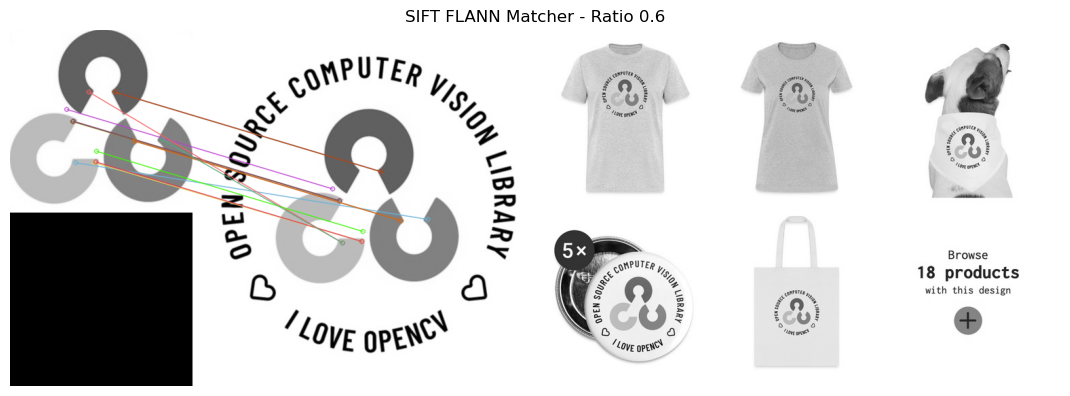

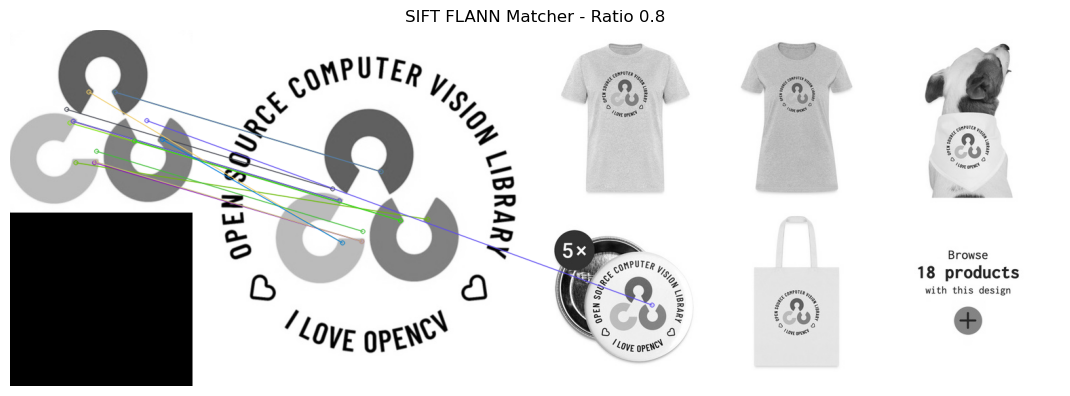

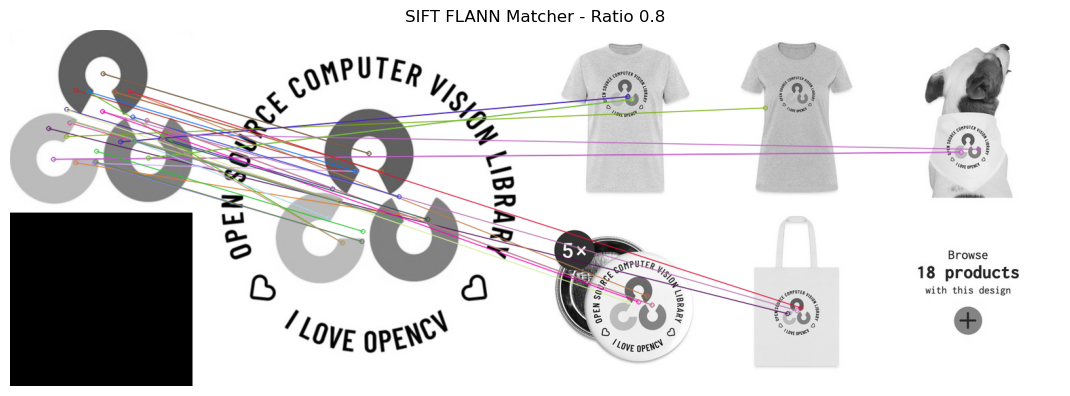

In [107]:
sift = cv.SIFT_create()
 
skp1, sdes1 = sift.detectAndCompute(img1, None)
skp2, sdes2 = sift.detectAndCompute(img2,None)
 

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50) 
 

flann = cv.FlannBasedMatcher(index_params,search_params)
flann_matches = flann.knnMatch(sdes1,sdes2,k=2)

ratio_06_matches = []
ratio_08_matches = []
ratio_10_matches = []

for m, n in flann_matches:
    if m.distance < 0.6 * n.distance:
        ratio_06_matches.append(m)
    if m.distance < 0.8 * n.distance:
        ratio_08_matches.append(m)
    if m.distance < 1.0 * n.distance:
        ratio_10_matches.append(m)


img_06 = cv.drawMatches(img1, skp1, img2, skp2, ratio_06_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
show(img_06, 'SIFT FLANN Matcher - Ratio 0.6', 40)

img_08 = cv.drawMatches(img1, skp1, img2, skp2, ratio_08_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
show(img_08, 'SIFT FLANN Matcher - Ratio 0.8', 40)

img_10 = cv.drawMatches(img1, skp1, img2, skp2, ratio_10_matches, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
show(img_10, 'SIFT FLANN Matcher - Ratio 0.8', 40)